<a href="https://colab.research.google.com/github/nourelsafty1/datavisualization/blob/main/Data_engineering_%26_visualization_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Data Exploration
path = kagglehub.dataset_download('pranavuikey/zomato-eda')
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        filepath = os.path.join(path, filename)
        break

data = pd.read_csv(filepath)
print(data.shape)



(51717, 17)


In [51]:
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)
data_types = data.dtypes
print("\nData Types of Each Column:")
print(data_types)

Missing Values per Column:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Data Types of Each Column:
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object

In [52]:
# For 'reviews_list' and 'menu_item', the null values are placeholders []
data['menu_item'] = data['menu_item'].apply(lambda x: np.nan if x == '[]' else x)
data['reviews_list'] = data['reviews_list'].apply(lambda x: np.nan if x == '[]' else x)

missing_values = data.isnull().sum()
print("Missing Values After Conversion:")
print(missing_values)


Missing Values After Conversion:
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                    7595
menu_item                      39617
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [53]:
# Identifying anomalies in 'rate'
rate_anomalies = data[~data['rate'].str.match(r'^\d+(\.\d+)?/5$', na=True)]
print("\nRows with 'rate' Anomalies (non-numeric):")
print(rate_anomalies[['url', 'rate']])


Rows with 'rate' Anomalies (non-numeric):
                                                     url    rate
72     https://www.zomato.com/bangalore/spicy-tandoor...     NEW
75     https://www.zomato.com/bangalore/om-sri-vinaya...     NEW
103    https://www.zomato.com/bangalore/floured-baked...  3.8 /5
110    https://www.zomato.com/bangalore/hari-super-sa...     NEW
130    https://www.zomato.com/bangalore/roll-magic-fa...     NEW
...                                                  ...     ...
51709  https://www.zomato.com/bangalore/the-farm-hous...  3.7 /5
51711  https://www.zomato.com/bangalore/bhagini-2-whi...  2.5 /5
51712  https://www.zomato.com/bangalore/best-brews-fo...  3.6 /5
51715  https://www.zomato.com/bangalore/chime-sherato...  4.3 /5
51716  https://www.zomato.com/bangalore/the-nest-the-...  3.4 /5

[22654 rows x 2 columns]


In [54]:
# Converting 'approx_cost(for two people)' to string and finding anomalies
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)
cost_anomalies = data[~data['approx_cost(for two people)'].str.isnumeric()]
print("\nRows with 'approx_cost(for two people)' Anomalies (non-numeric):")
print(cost_anomalies[['url', 'approx_cost(for two people)']])


Rows with 'approx_cost(for two people)' Anomalies (non-numeric):
                                                     url  \
67     https://www.zomato.com/gustoesbeerhouse?contex...   
119    https://www.zomato.com/bangalore/k27-the-pub-b...   
166    https://www.zomato.com/bangalore/patio-805-jay...   
207    https://www.zomato.com/bangalore/chutney-chang...   
217    https://www.zomato.com/bangalore/toscano-jayan...   
...                                                  ...   
51708  https://www.zomato.com/bangalore/keys-cafe-key...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

      approx_cost(for two people)  
67                          1,200  
119                         1,000  
166                         1,200  
207                         1,500  
217                         1,300

In [55]:
# Identifying phone anomalies with newline characters
phone_anomalies = data[data['phone'].str.contains(r'\r\n', na=False)]
print("\nRows with Newline Characters in 'phone' (Phone Anomalies):")
print(phone_anomalies[['url', 'phone']])


Rows with Newline Characters in 'phone' (Phone Anomalies):
                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
4      https://www.zomato.com/bangalore/grand-village...   
5      https://www.zomato.com/bangalore/timepass-dinn...   
6      https://www.zomato.com/bangalore/rosewood-inte...   
7      https://www.zomato.com/bangalore/onesta-banash...   
...                                                  ...   
33616  https://www.zomato.com/bangalore/aatas-kitchen...   
33619  https://www.zomato.com/Cilantro?context=eyJzZS...   
33621  https://www.zomato.com/bangalore/chinese-fire-...   
33622  https://www.zomato.com/bangalore/pabrais-fresh...   
33623  https://www.zomato.com/bangalore/delicious-dem...   

                                  phone  
0        080 42297555\r\n+91 9743772233  
4      +91 8026612447\r\n+91 9901210005  
5      +91 9980040002\r\n+91 9980063005  
6        +91 9731716688\r\n080 26740366  
7        

In [56]:
# Identifying empty reviews
empty_reviews = data[data['reviews_list'].str.contains(r'^\[\]$', na=False)]
print("\nRows with Empty 'reviews_list' (Anomalies):")
print(empty_reviews[['url', 'reviews_list']])


Rows with Empty 'reviews_list' (Anomalies):
Empty DataFrame
Columns: [url, reviews_list]
Index: []


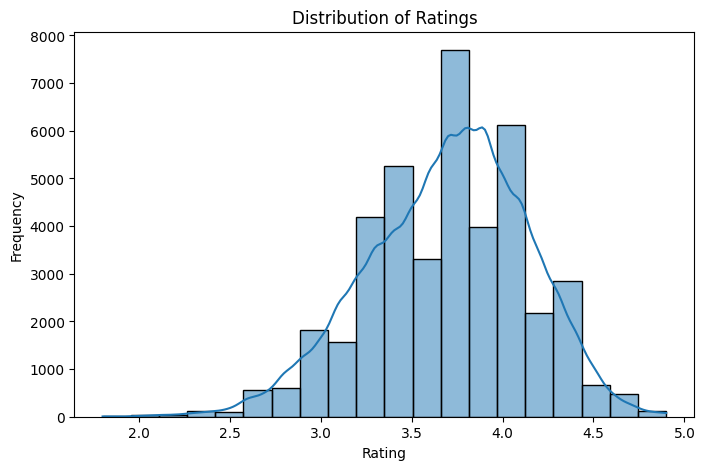

In [57]:
#Data Visualization Before Cleaning
#1. using a histogram to visualize the ratings distribution
# Converts all entries in 'rate' to strings, then replace 'NEW' with NaN and remove '/5'
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].replace('NEW', None)
data['rate'] = data['rate'].str.replace('/5', '', regex=False)

# Converts to numeric, with errors='coerce' to handle any remaining non-numeric values
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

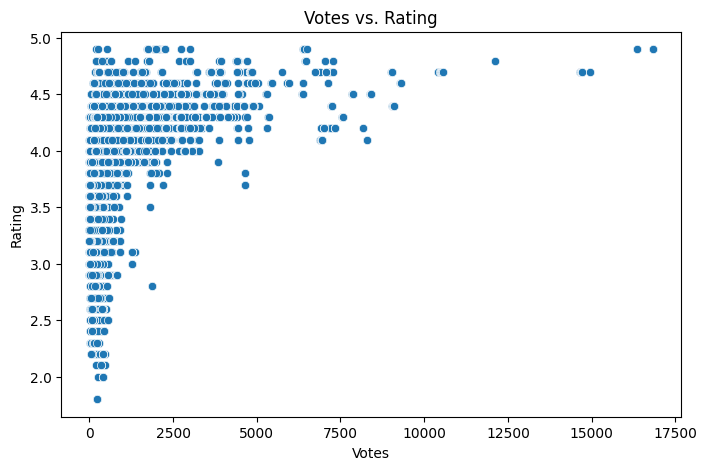

In [58]:
#2. Scatter Plot To help uncover a relationship between votes and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='votes', y='rate')
plt.title("Votes vs. Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()

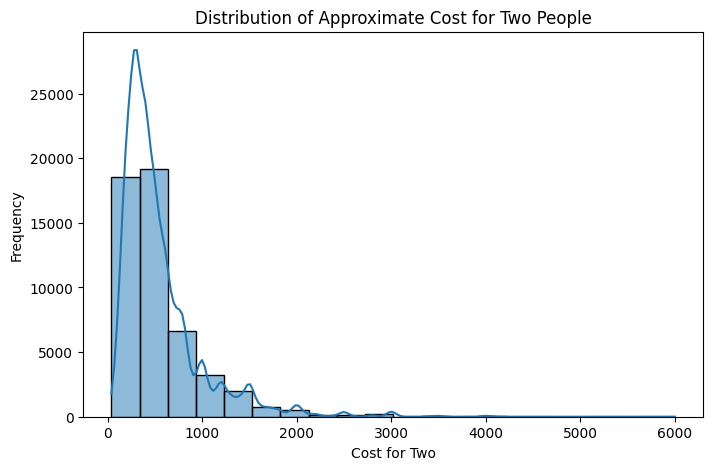

In [59]:
#3. Histogram for 'approx_cost(for two people)'
# Ensures all entries in 'approx_cost(for two people)' are strings
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].astype(str)

# Removes commas and convert the column to numeric, setting non-numeric values to NaN
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')
plt.figure(figsize=(8, 5))
sns.histplot(data['approx_cost(for two people)'].dropna(), bins=20, kde=True)
plt.title("Distribution of Approximate Cost for Two People")
plt.xlabel("Cost for Two")
plt.ylabel("Frequency")
plt.show()

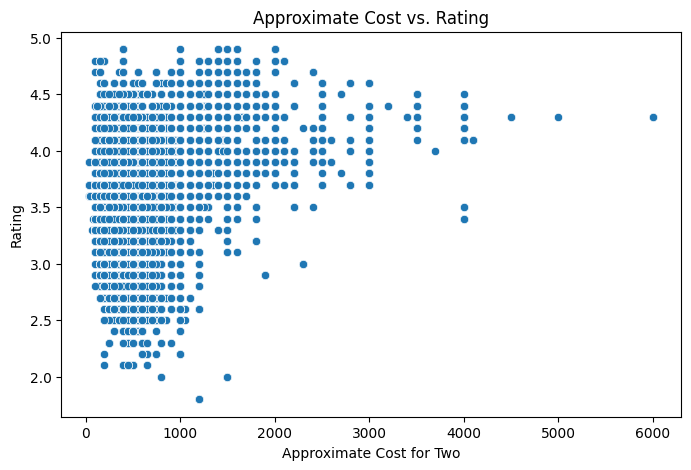

In [60]:
# 4.Scatter Plot for Cost vs Rating to see if there is a relationship between cost and rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='approx_cost(for two people)', y='rate')
plt.title("Approximate Cost vs. Rating")
plt.xlabel("Approximate Cost for Two")
plt.ylabel("Rating")
plt.show()

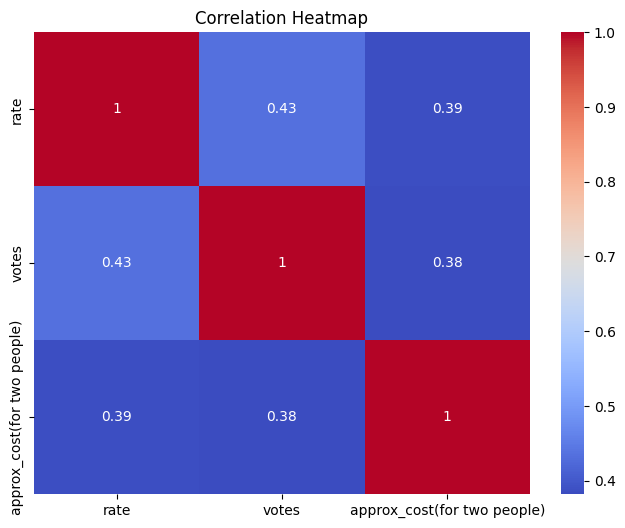

In [61]:
 #5. Correlation heatmap (only numerical columns to visualize  correlations in numerical data)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['rate', 'votes', 'approx_cost(for two people)']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

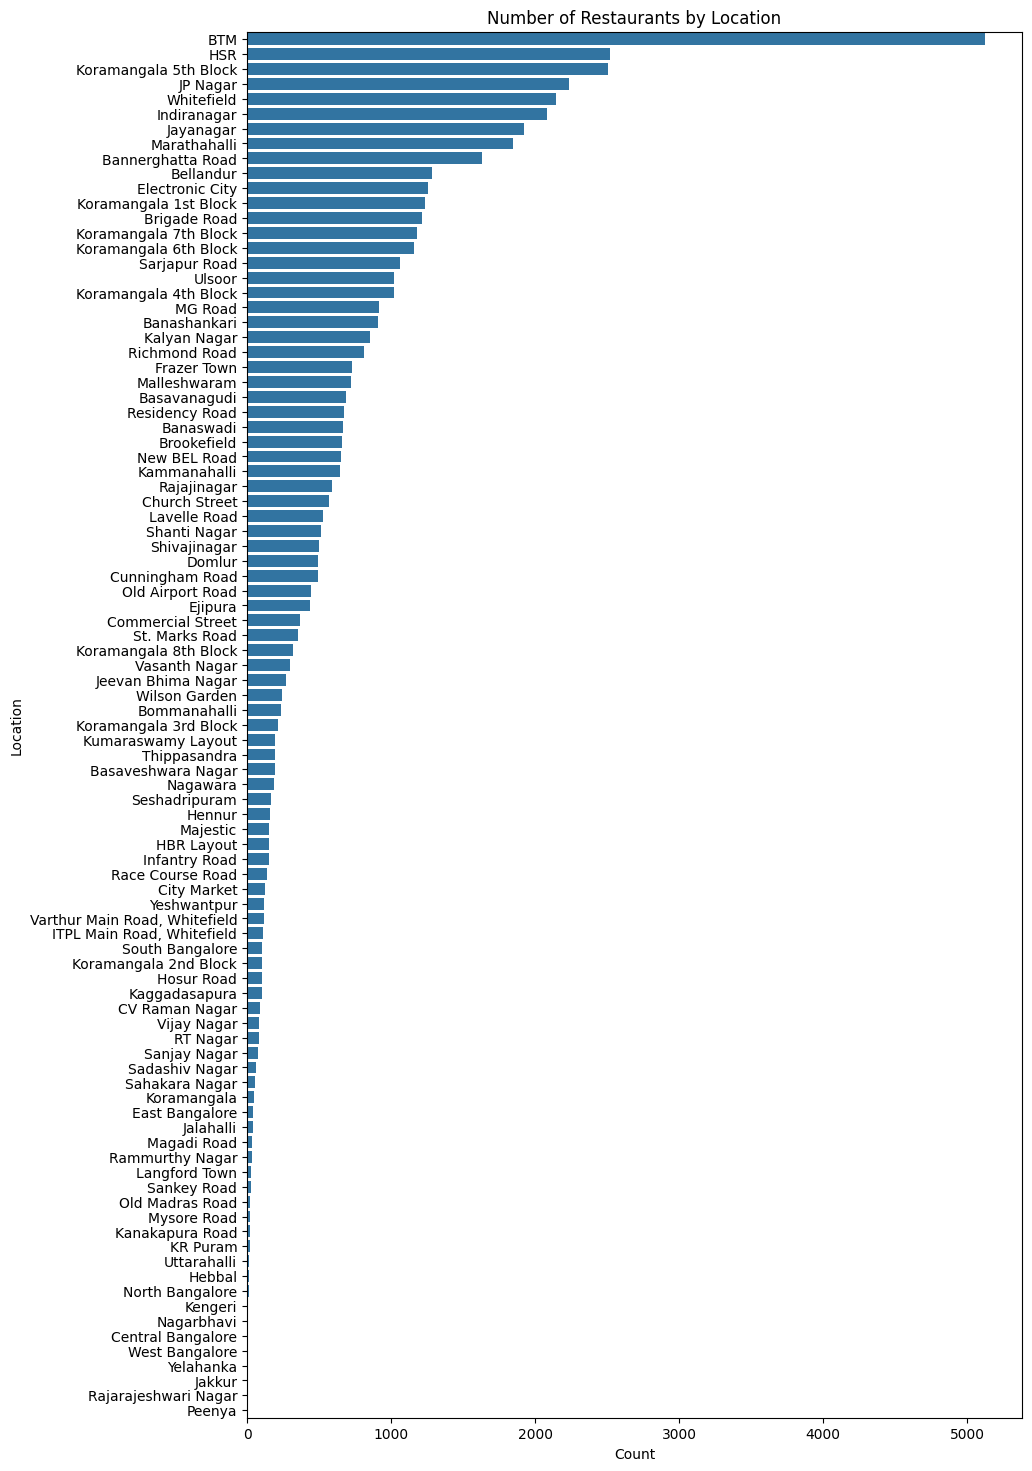

In [62]:
#6. Count of restaurants in each location
plt.figure(figsize=(10,18))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title("Number of Restaurants by Location")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

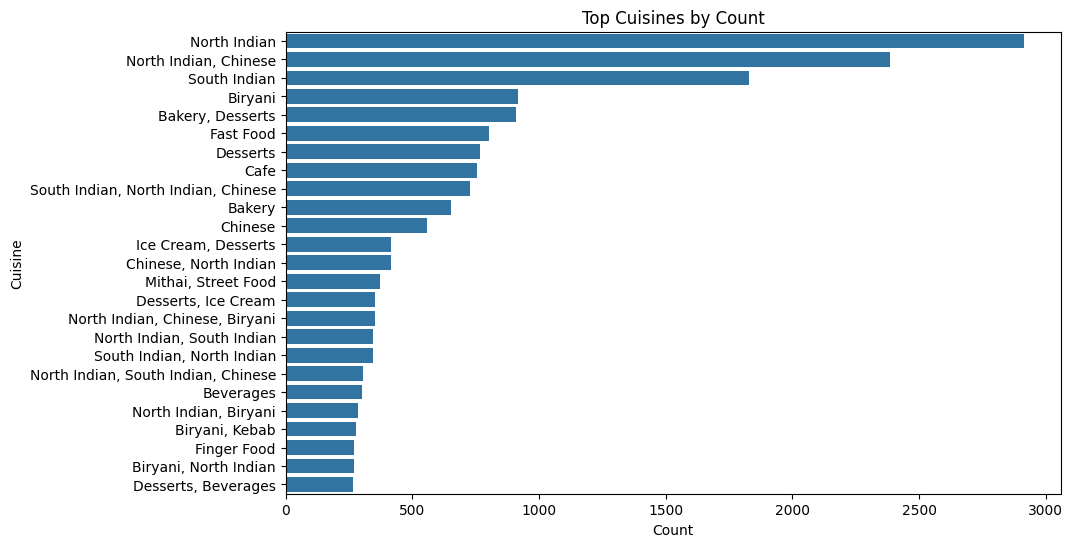

In [63]:
#7. Count of restaurants by cuisine type
plt.figure(figsize=(10, 6))
top_cuisines = data['cuisines'].value_counts().head(25)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top Cuisines by Count")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

In [64]:
# Data Cleaning
# Handles anomalies in 'rate' column
data['rate'] = data['rate'].replace('NEW', 'NaN')  # Replaces 'NEW' with NaN
data['rate'] = data['rate'].astype(str)  # Ensures 'rate' is of string type
data['rate'] = data['rate'].str.extract('(\d+\.\d+)')  # Extracts numeric values
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')  # Converts to float, invalid values become NaN
# Handling missing values
data['rate'] = data['rate'].fillna(data['rate'].median())  # Impute NaN with median as it doesn't get affected with outliers or data skew as the mean

In [65]:
# Handling anomalies in 'approx_cost(for two people)' column
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].replace(',', '', regex=True)
data['approx_cost(for two people)'] = pd.to_numeric(data['approx_cost(for two people)'], errors='coerce')  # Convert to float
# Handling missing values
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].fillna(data['approx_cost(for two people)'].median())  # Impute NaN with median

In [66]:
# Handling anomalies in 'phone' column
data['phone'] = data['phone'].str.replace(r'\r\n', ' ', regex=True)  # Replaces newline characters with space
# Handling missing values
data['phone'] = data['phone'].fillna("Unknown")  # Assigns 'Unknown' to missing phone values

In [67]:
# Handling anomalies in 'reviews_list' column
#data['reviews_list'] = data['reviews_list'].apply(lambda x: [] if x == '[]' else x)  # Replaces empty strings with empty list
data =data.drop(columns=['reviews_list'])

In [68]:
data =data.drop(columns=['menu_item'])

In [69]:
# Handling missing values in the rest of the columns
data['location'] = data['location'].fillna(data['location'].mode()[0])  # Mode imputation for location since it's a categorical value
data['rest_type'] = data['rest_type'].fillna(data['rest_type'].mode()[0])  # Mode imputation for rest_type since it's a categorical value
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode()[0])  # Mode imputation for cuisines since it's a categorical value
data['dish_liked'] = data['dish_liked'].fillna(data['dish_liked'].mode()[0])  # Mode imputation for dish_liked since it's a categorical value
print("Missing Values per Column:\n", data.isnull().sum())
print("Data Types of Each Column:\n", data.dtypes)


Missing Values per Column:
 url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64
Data Types of Each Column:
 url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisine

In [70]:
# Cleaning and formatting the rest_type column
data['rest_type'] = data['rest_type'].str.lower().str.strip()
data['rest_type'].nunique() #93 unique Values
data['rest_type'].unique()
standardized_values = [
    'casual dining', 'cafe', 'quick bites', 'delivery', 'mess', 'dessert parlor', 'bakery',
    'pub', 'takeaway', 'fine dining', 'beverage shop', 'sweet shop', 'bar', 'confectionery',
    'kiosk', 'food truck', 'microbrewery', 'lounge', 'food court', 'dhaba', 'club', 'pop up', 'irani cafe'
]

# Mapping the original values to the standardized ones
mapping = {
    'casual dining': 'casual dining',
    'cafe, casual dining': 'casual dining',
    'quick bites': 'quick bites',
    'casual dining, cafe': 'casual dining',
    'cafe': 'cafe',
    'quick bites, cafe': 'quick bites',
    'cafe, quick bites': 'quick bites',
    'delivery': 'delivery',
    'mess': 'mess',
    'dessert parlor': 'dessert parlor',
    'bakery, dessert parlor': 'bakery',
    'pub': 'pub',
    'bakery': 'bakery',
    'takeaway, delivery': 'takeaway',
    'fine dining': 'fine dining',
    'beverage shop': 'beverage shop',
    'sweet shop': 'sweet shop',
    'bar': 'bar',
    'beverage shop, quick bites': 'beverage shop',
    'confectionery': 'confectionery',
    'quick bites, beverage shop': 'quick bites',
    'dessert parlor, sweet shop': 'dessert parlor',
    'bakery, quick bites': 'bakery',
    'sweet shop, quick bites': 'sweet shop',
    'kiosk': 'kiosk',
    'food truck': 'food truck',
    'quick bites, dessert parlor': 'quick bites',
    'beverage shop, dessert parlor': 'beverage shop',
    'takeaway': 'takeaway',
    'pub, casual dining': 'casual dining',
    'casual dining, bar': 'casual dining',
    'dessert parlor, beverage shop': 'dessert parlor',
    'quick bites, bakery': 'quick bites',
    'dessert parlor, quick bites': 'dessert parlor',
    'microbrewery, casual dining': 'microbrewery',
    'lounge': 'lounge',
    'bar, casual dining': 'casual dining',
    'food court': 'food court',
    'cafe, bakery': 'cafe',
    'dhaba': 'dhaba',
    'quick bites, sweet shop': 'sweet shop',
    'microbrewery': 'microbrewery',
    'food court, quick bites': 'food court',
    'pub, bar': 'pub',
    'casual dining, pub': 'casual dining',
    'lounge, bar': 'lounge',
    'food court, dessert parlor': 'food court',
    'casual dining, sweet shop': 'sweet shop',
    'food court, casual dining': 'food court',
    'casual dining, microbrewery': 'casual dining',
    'sweet shop, dessert parlor': 'sweet shop',
    'bakery, beverage shop': 'bakery',
    'lounge, casual dining': 'lounge',
    'cafe, food court': 'food court',
    'beverage shop, cafe': 'cafe',
    'cafe, dessert parlor': 'cafe',
    'dessert parlor, cafe': 'dessert parlor',
    'dessert parlor, bakery': 'bakery',
    'microbrewery, pub': 'microbrewery',
    'bakery, food court': 'food court',
    'club': 'club',
    'quick bites, food court': 'quick bites',
    'bakery, cafe': 'bakery',
    'bar, cafe': 'bar',
    'pub, cafe': 'pub',
    'casual dining, irani cafe': 'irani cafe',
    'fine dining, lounge': 'fine dining',
    'bar, quick bites': 'quick bites',
    'bakery, kiosk': 'bakery',
    'pub, microbrewery': 'microbrewery',
    'microbrewery, lounge': 'microbrewery',
    'fine dining, microbrewery': 'fine dining',
    'fine dining, bar': 'fine dining',
    'mess, quick bites': 'quick bites',
    'dessert parlor, kiosk': 'dessert parlor',
    'bhojanalya': 'mess',
    'casual dining, quick bites': 'casual dining',
    'pop up': 'pop up',
    'cafe, bar': 'cafe',
    'casual dining, lounge': 'casual dining',
    'bakery, sweet shop': 'bakery',
    'microbrewery, bar': 'microbrewery',
    'cafe, lounge': 'cafe',
    'bar, pub': 'pub',
    'lounge, cafe': 'lounge',
    'club, casual dining': 'club',
    'quick bites, mess': 'quick bites',
    'quick bites, meat shop': 'quick bites',
    'quick bites, kiosk': 'quick bites',
    'lounge, microbrewery': 'microbrewery',
    'food court, beverage shop': 'food court',
    'dessert parlor, food court': 'food court',
    'bar, lounge': 'bar'
}
data['rest_type'] = data['rest_type'].map(mapping)

In [71]:
# IQR was chosen as we don't know the distribution of the data and there's also multiple data types which makes IQR the best fit to determine outliers and handle them
Q1 = data.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = data.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

outliers_iqr = (data.select_dtypes(include=['float64', 'int64']) < min) | (data.select_dtypes(include=['float64', 'int64']) > max)

outlier_rows = data[outliers_iqr.any(axis=1)]
print("Outliers based on IQR method:\n", outlier_rows)

data_cleaned = data[~outliers_iqr.any(axis=1)]
print("Cleaned Dataframe without outliers:\n", data_cleaned)

Outliers based on IQR method:
                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
7      https://www.zomato.com/bangalore/onesta-banash...   
9      https://www.zomato.com/bangalore/smacznego-ban...   
...                                                  ...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
7      2

In [72]:
print(data.shape)

(51717, 15)


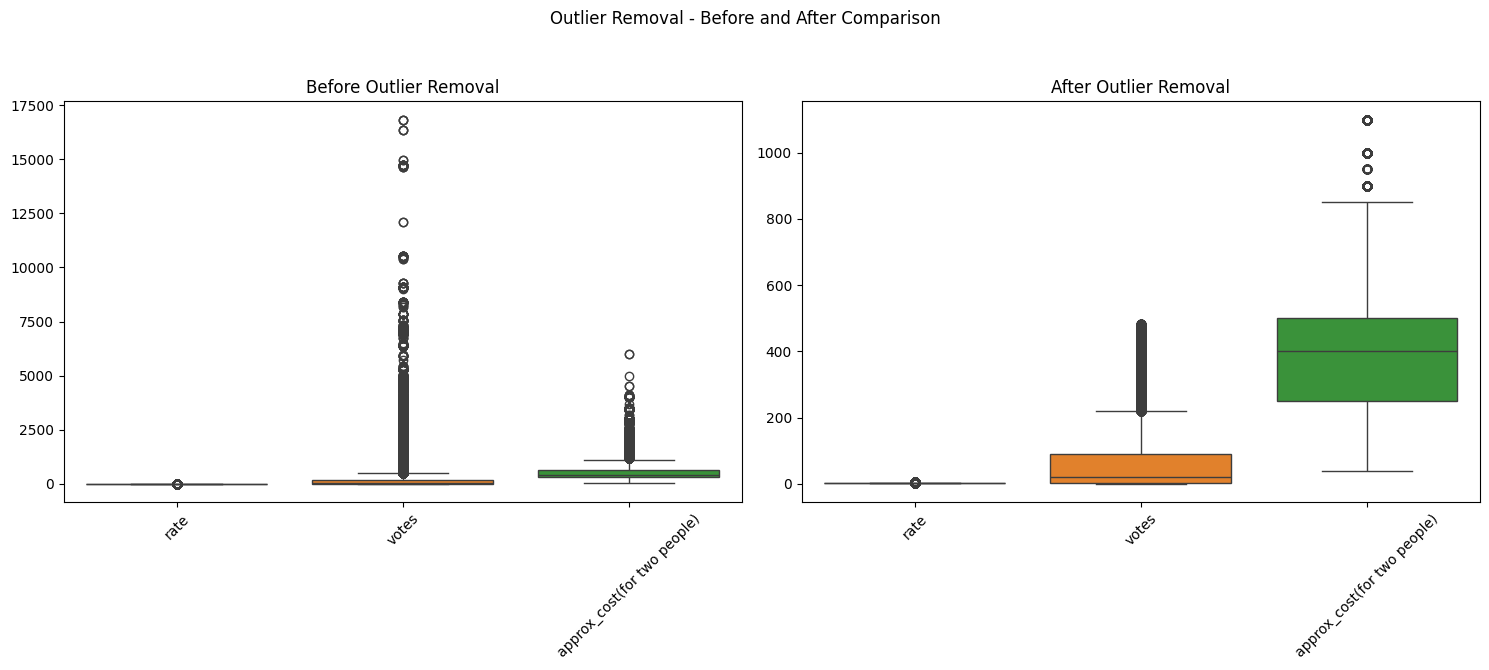

In [73]:
# Data Visualization After Data Cleaning
# Select only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.suptitle("Outlier Removal - Before and After Comparison")

# Box plot before removing outliers
sns.boxplot(data=data[numerical_cols], ax=axes[0])
axes[0].set_title("Before Outlier Removal")
axes[0].tick_params(axis='x', rotation=45)

# Box plot after removing outliers
sns.boxplot(data=data_cleaned[numerical_cols], ax=axes[1])
axes[1].set_title("After Outlier Removal")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Research questions

Research question #1. What is the relationship between approximate cost for two and votes for the top 10 locations (by number of restaurants)?

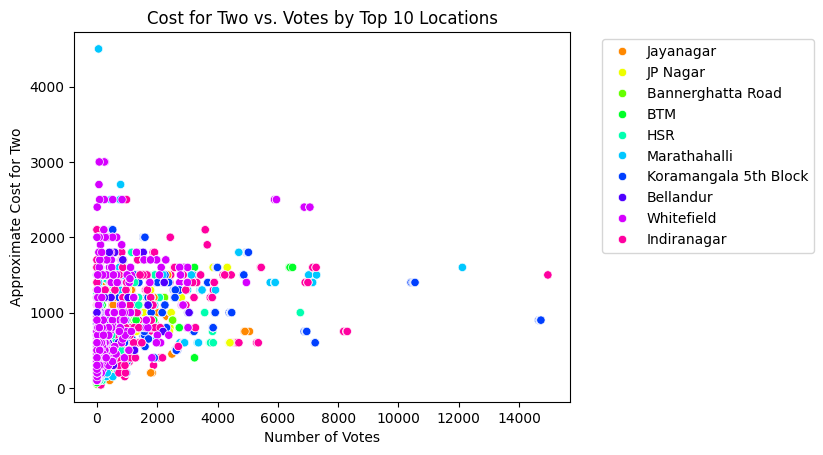

In [74]:
#top 10 locations i.e locations with the highest number of resturants
top_locations = data['location'].value_counts().head(10).index
filtered_data = data[data['location'].isin(top_locations)]
num_locations = len(top_locations)
palette = sns.color_palette("hsv", num_locations)
sns.scatterplot(x="votes", y="approx_cost(for two people)", hue="location", data=filtered_data, palette=palette)
plt.title("Cost for Two vs. Votes by Top 10 Locations")
plt.xlabel("Number of Votes")
plt.ylabel("Approximate Cost for Two")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


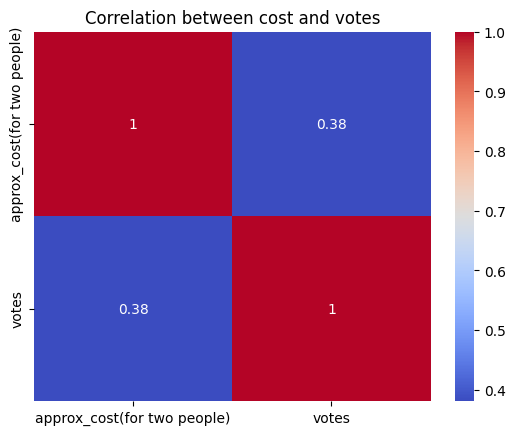

In [75]:
correlation = data[["approx_cost(for two people)", "votes"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between cost and votes")
plt.show()


Question 1 insights -> After analyzing the scatter plot I could tell that restaurants with lower approximate costs for two(around 500$ to $1500) receive more votes, which indicates that affordability is a big factor in resturant popularity.
High-cost restaurants with aproximate cost for two >2000 are less popular overall and have lower votes.
After analyzing the heatmap, I could tell that there's a moderately positive relationship between aproximate cost and votes (0.38) which could mean when costs are higher votes can also be higher however relationship isn't that strong so it could reflect that mid-range resturants dominate.

Research Question #2. Which locations have the highest-rated or most frequently reviewed restaurants?
Objective: To analyze which locations tend to have the most popular restaurants, based on ratings


Research Question #3.	Are there certain types of restaurants that consistently perform better in specific locations, and how does this change by location?  The objective is to see if certain restaurant types are more successful in specific areas and to explore if location-specific preferences exist.

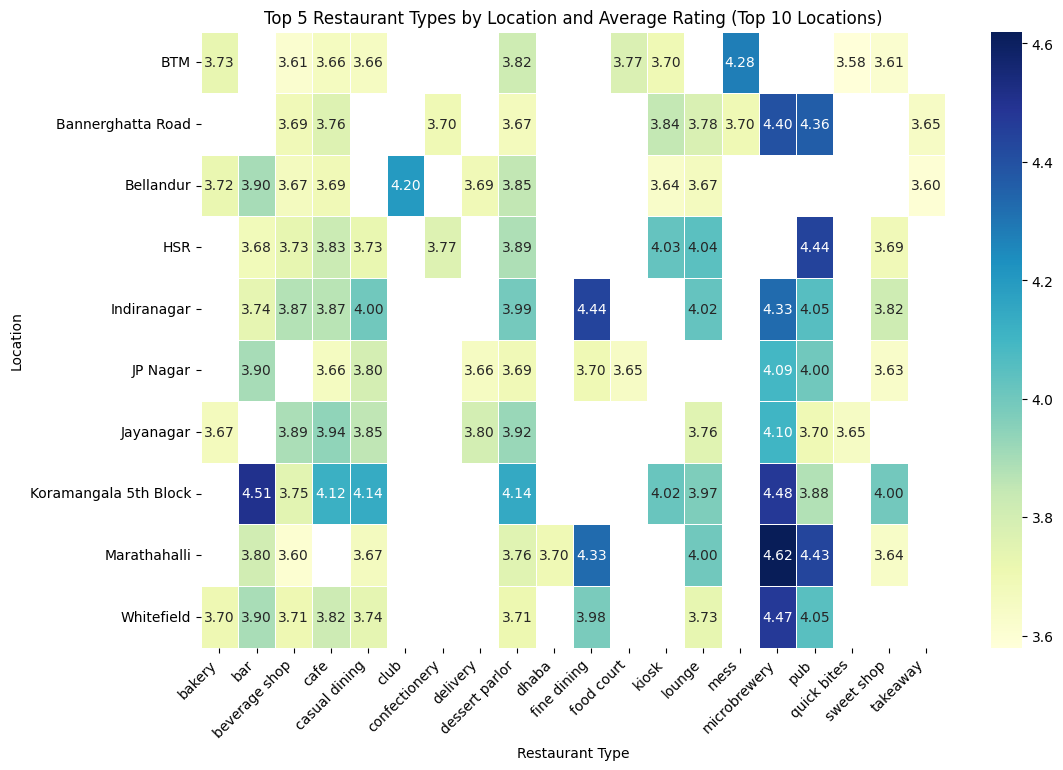

In [87]:
avg_rating_by_location_type = filtered_data.groupby(['location', 'rest_type'])['rate'].mean().reset_index()
avg_rating_by_location_type = avg_rating_by_location_type.sort_values(by=['location', 'rate'], ascending=[True, False])
top_n_types = 10
top_avg_rating_by_location_type = avg_rating_by_location_type.groupby('location').head(top_n_types)
heatmap_data = top_avg_rating_by_location_type.pivot(index='location', columns='rest_type', values='rate')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
plt.title("Top 5 Restaurant Types by Location and Average Rating (Top 10 Locations)")
plt.xlabel("Restaurant Type")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.show()


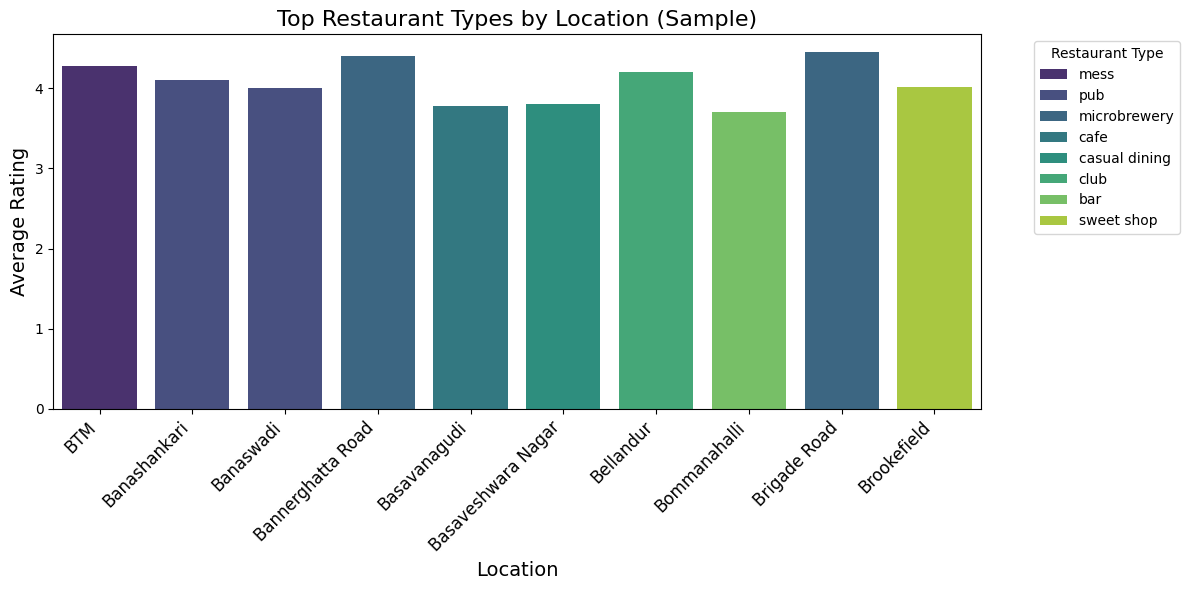

In [88]:
type_location_ratings = data.groupby(['location', 'rest_type'])['rate'].mean().reset_index()
top_types_by_location = type_location_ratings.sort_values(['location', 'rate'], ascending=[True, False]).groupby('location').head(1)
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='rate', hue='rest_type', data=top_types_by_location.head(10), palette='viridis')
plt.title('Top Restaurant Types by Location (Sample)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Restaurant Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Heatmap Analysis:

The heatmap shows clear preferences for certain restaurant types in certain locations. For example, microbreweries and fine dining consistently achieve higher ratings in areas like Koramangala 5th Block, Indiranagar, and Whitefield.
Casual dining maintains semi-high ratings across certain areas.

Bar Plot Analysis:
Locations such as Brigade Road, Koramangala, and Indiranagar prefer options such as microbreweries, pubs, and lounges.

Overall Observation:
The plots shown above suggest that location based preferences do in fact exist with different types of restaurants being preferred in certain areas.

**-)Question-4**

 What is the distribution of the number of votes  across restaurants of different types? This will help reveal if certain types of restaurants tend to accumulate more reviews and how they compare in terms of engagement

<ipython-input-81-9e5764c3e7e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


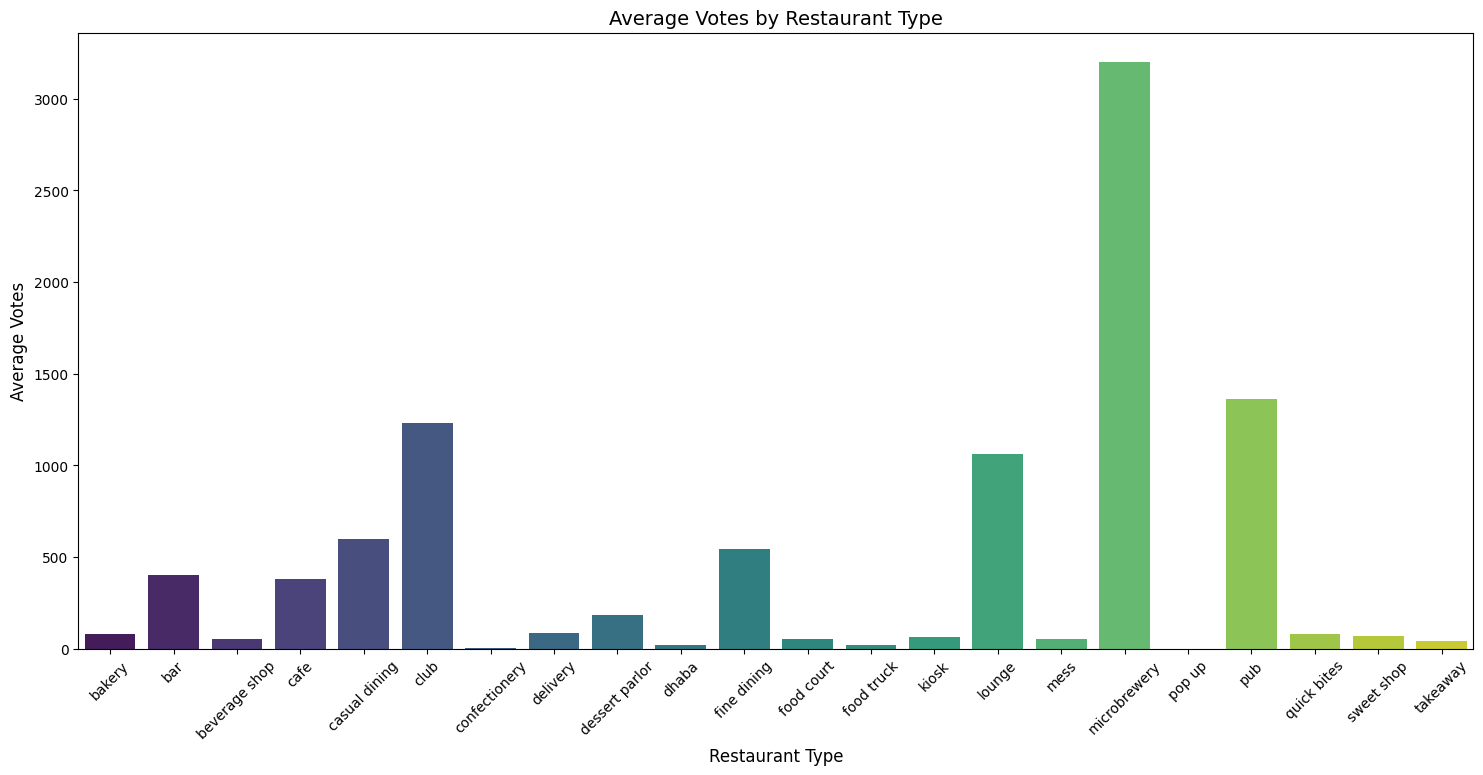

In [81]:
# Compute average votes for each restaurant type
average_votes = data.groupby("rest_type")["votes"].mean().reset_index()
average_votes = average_votes.rename(columns={"votes": "average_votes"})

# Create the bar chart
plt.figure(figsize=(18, 8))
sns.barplot(
    data=average_votes,  # Use the aggregated DataFrame
    x="rest_type",
    y="average_votes",
    palette="viridis"
)

# Add title and labels
plt.title("Average Votes by Restaurant Type", fontsize=14)
plt.xlabel("Restaurant Type", fontsize=12)
plt.ylabel("Average Votes", fontsize=12)
plt.xticks(rotation=45)
plt.show()


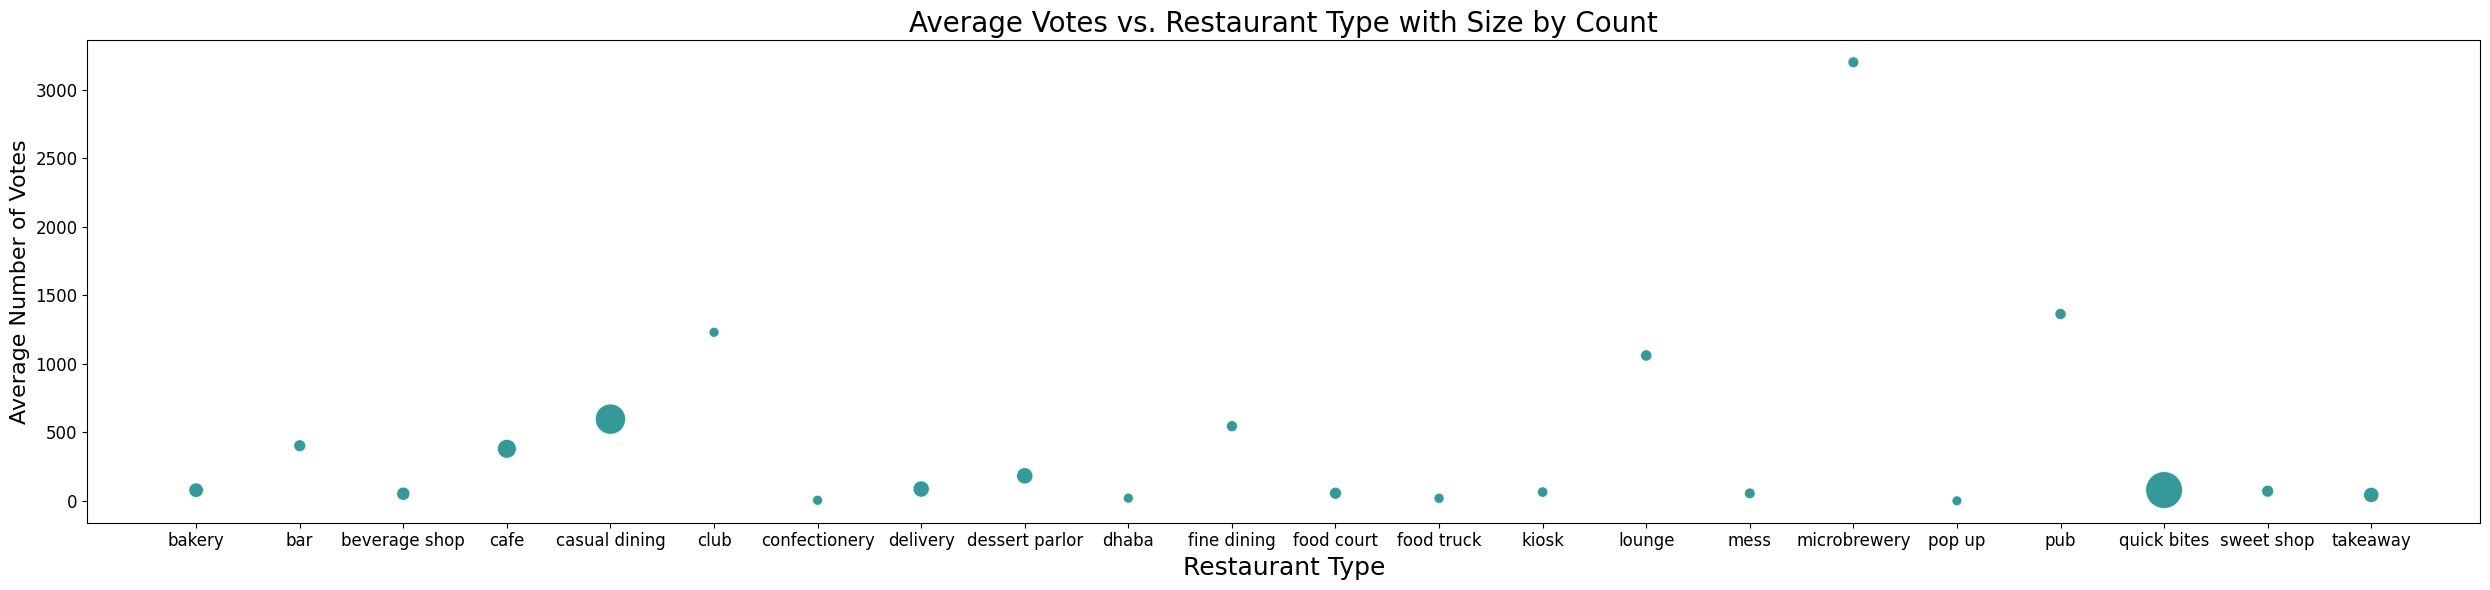

In [82]:
# Aggregating data for the bubble chart
bubble_data = data.groupby('rest_type').agg(
    avg_votes=('votes', 'mean'),
    count=('rest_type', 'size')
).reset_index()

# Plotting the bubble chart using scatterplot
plt.figure(figsize=(25, 6))
sns.scatterplot(
    data=bubble_data,
    x='rest_type',
    y='avg_votes',
    size='count',
    sizes=(50, 700),
    alpha=0.8,
    legend=False,
    color='teal'
)

plt.title('Average Votes vs. Restaurant Type with Size by Count', fontsize=20)
plt.xlabel('Restaurant Type', fontsize=18)
plt.ylabel('Average Number of Votes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

**BarPlot :**

- shows that microbreweries , clubs and pubs, these restaurant types have the highest average votes in the chart, and shows that pop up , confectionery and dhaba have the lowest average votes in the chart

**Bubble Plot :**

- Microbrewery have the highest average number of votes, confirming barplot chart, also shows that microbrewery have low count of resturants

- Quick Bites have a high count of restaurants but fewer average votes.

**-It allows for insights into engagement trends:**

- High average votes are often associated with fewer, more specialized restaurants

**Insights:**

- The bar plot shows that restaurant types with highest average votes , and bubble plot highlights how different restaurant types compare in terms of both average votes and the number of restaurants.

- Overall the analysis shows patterns in customer interest across different restaurant types.







**-)Question-5**

How are restaurant ratings distributed across different approximate cost categories for two people? This analysis will help determine if there is a correlation between higher costs and higher or lower ratings for restaurants.


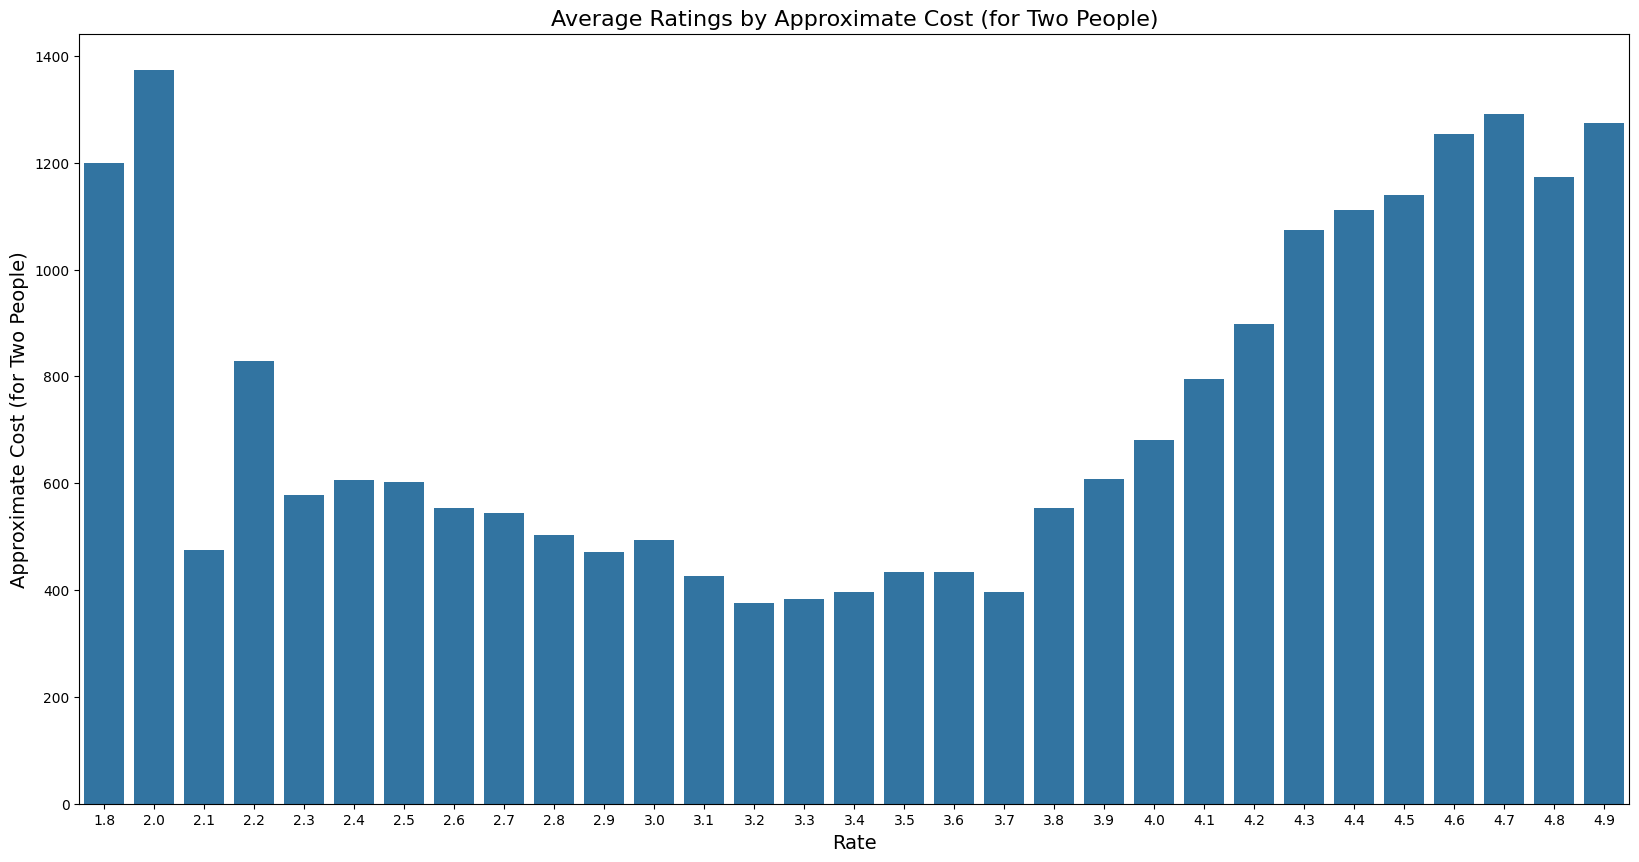

In [83]:
# Group the data by the 'rate' (ratings) and calculate the mean of 'approx_cost(for two people)' for each rating
average_ratings = data.groupby("rate")["approx_cost(for two people)"].mean().reset_index()

# Set the figure size to make the plot wide to show all values
plt.figure(figsize=(20, 10))

# Create a bar plot to show the average cost for two people ('approx_cost(for two people)') for each rating ('rate')
sns.barplot( x="rate",y="approx_cost(for two people)", data=average_ratings)

plt.title("Average Ratings by Approximate Cost (for Two People)", fontsize=16)
plt.xlabel("Rate", fontsize=14)
plt.ylabel("Approximate Cost (for Two People)", fontsize=14)
plt.show()


<ipython-input-84-223f14f892c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="approx_cost(for two people)", y="rate", data=data, palette="viridis")


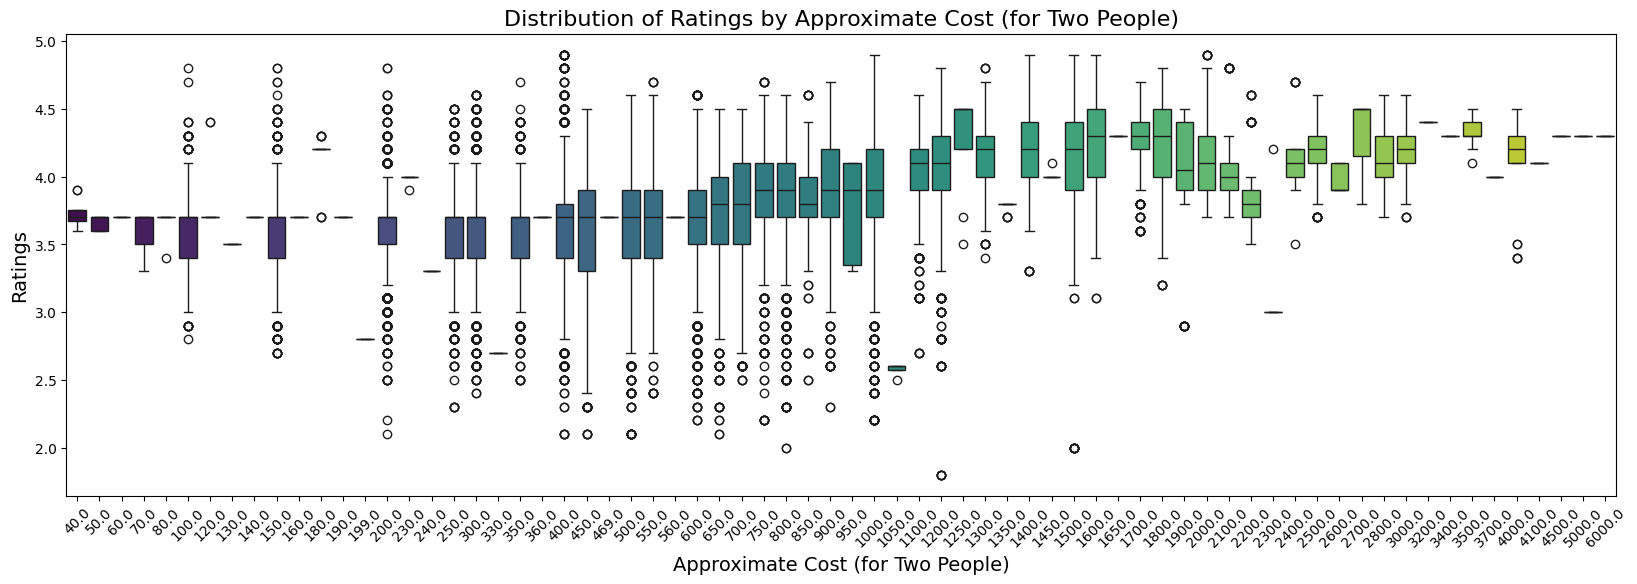

In [84]:
# Set the size of the figure to make the plot wide for better readability
plt.figure(figsize=(20, 6))

# Create a boxplot to visualize the distribution of ratings ('rate') across different 'approx_cost(for two people)' categories
sns.boxplot(x="approx_cost(for two people)", y="rate", data=data, palette="viridis")

plt.title("Distribution of Ratings by Approximate Cost (for Two People)", fontsize=16)
plt.xlabel("Approximate Cost (for Two People)", fontsize=14)
plt.ylabel("Ratings", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Barplot Insights :**

-In Barplot shows that resturants with rating (2.0) has the highest approximate cost, beside that the resturants with high raiting (after 4.0) have higher approxmiate cost than the resturants with lower rating.

**Boxplot Insights :**

-The box plot show that the high approximate cost for restaurants with a rating of 2.0 is actually an outlier. However, it confirms the bar plot observation that restaurants with higher ratings (above 4.0) have larger approximate costs.


**For lower-cost categories (40 to 200):**

 -The ratings vary widely and include many outliers, suggesting inconsistent customer experiences. This could be due to differences in food quality or service at low-cost restaurants.

**Midrange Categories (400 to 1500):**

-In midrange cost categories, the ratings are more consistent, with fewer outliers and less variation. This suggests that midrange restaurants offer more reliable experiences.


**Higher Cost Categories (above 2000):**

For higher cost categories the ratings are high and fewer negative outliers. This shows that higher-cost restaurants deliver premium experiences,it led to better ratings.

**Insights:**

The both plots show a slight positive relation between higher costs and better ratings, especially in midrange and high-cost categories. However, outliers in all cost categories show that cost alone does not determine a restaurant's rating. Other factors like location, cuisine, and customer reviews play a role.


**-)Question-6**
What is the relationship between restaurant ratings and the availability of table booking? Objective: To explore if allowing table reservations correlates with higher ratings or review volumes

<Axes: xlabel='book_table', ylabel='rate'>

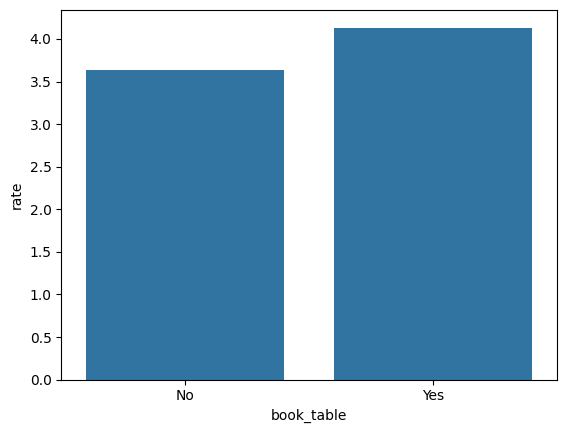

In [85]:
#Group by 'table_booking' and calculate the mean rating for each group
average_ratings = data.groupby("book_table")["rate"].mean().reset_index()


#Create the bar plot
sns.barplot(
    x="book_table",
    y="rate",
    data=average_ratings,
    legend=False  # Legend is not needed as there's no hue
)


<Axes: xlabel='book_table', ylabel='rate'>

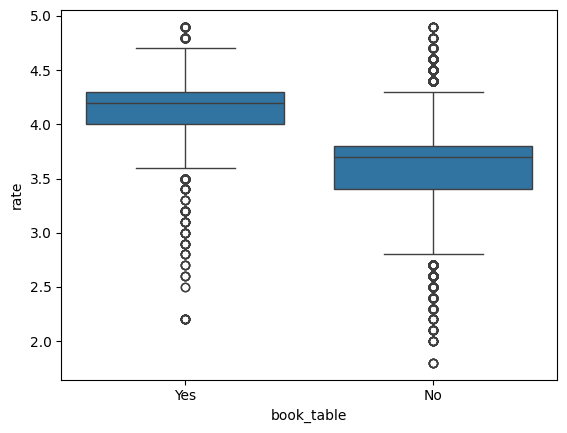

In [86]:
#Create a box plot to display the distribution of ratings by table booking availability
sns.boxplot(
    x="book_table",
    y="rate",
    data=data
)


### **BarPlot Insight:**

**Ratings for Restaurants With Table Booking (Yes):**


- restaurants offering table booking have a higher mean rating.


**Ratings for Restaurants Without Table Booking (No):**

- The average rating for restaurants that do not allow table bookings is lower compared to those that do.


### **BoxPlot Insight:**



**Ratings for Restaurants with Table Booking (Yes):**

- There are a few outliers below rating (3.5) , but the overall ratings closer to the upper range.

**Ratings for Restaurants without Table Booking (No):**

- There are more outliers above (4.5) and below (3.0), but the overall ratings is closer to the middle range.


### **Insight:**

- The data suggests that restaurants offering table reservations lead to receive higher and more consistent ratings compared to those that do not.